https://stackoverflow.com/questions/1995734/how-are-exceptions-implemented-under-the-hood

https://stackoverflow.com/questions/1877686/implementing-python-exceptions



https://stackoverflow.com/questions/56942284/what-is-the-difference-between-raise-and-except/56942536

### problem that we do not log the exception -> resume execution
- you don't have a hook to the exception here since you don't use as ex. To get a hook on the exception use `sys.exc_info()`

In [8]:
l=[1,2,3]

try:
    l[4]
except:
    print('Exception occured!')

Exception occured!


In [9]:
try:
    l[4]
except Exception:
    print('Exception occured!')

Exception occured!


### Too broad to use Exception.. Better make it more specialized

In [12]:
try:
    l[4]
except Exception as ex:
    print('Exception occured!')
    print(ex.__class__, '-->', str(ex))
    #print(ex) --> get str(ex)

Exception occured!
<class 'IndexError'> --> list index out of range


### This is good practice

In [13]:
try:
    l[4]
except IndexError as ex:
    print('Exception occured!')
    print(ex.__class__, '-->', str(ex))

Exception occured!
<class 'IndexError'> --> list index out of range


### else: code executes in try terminates normally
### finally: always executes!!! (good for cleanup code)

In [31]:
try:
    l[20]
except IndexError as ex:
    print('Exception occured!')
    print(ex.__class__, '-->', str(ex))
else: # code executes in try terminates normally
    print('code went normal')  
finally: # always executes
    print('I always execute :)')

Exception occured!
<class 'IndexError'> --> list index out of range
I always execute :)


In [32]:
try:
    l[4]
except IndexError as ex:
    print('Exception occured!')
    print(ex.__class__, '-->', str(ex))
else: # code executes in try terminates normally
    print('code went normal') 
finally:
    print('I always execute :)')

code went normal
I always execute :)


### try - finally
### Exception is NOT handled - it will propagate up. Finally will run before propagation (good for cleanup code)

- This is the same as have a try - except that does NOT handle the exception

In [ ]:
try:
    pass
finally:
    pass

### raise keyword - must be an instance of BaseException

In [33]:
raise ValueError()

ValueError: 

### You can use multiple arguments (because BaseException has *args in __init__)

In [34]:
ex = ValueError('a', 'b', 'c')
ex.args

('a', 'b', 'c')

In [35]:
repr(ex)

"ValueError('a', 'b', 'c')"

### We can re-raise the currect exception inside an exception block to let the propagation continue (useful for bare excepts)

In [ ]:
try:
    pass
except:
    log('...')
    raise   # LET THE EXCEPTION PROPAGATE

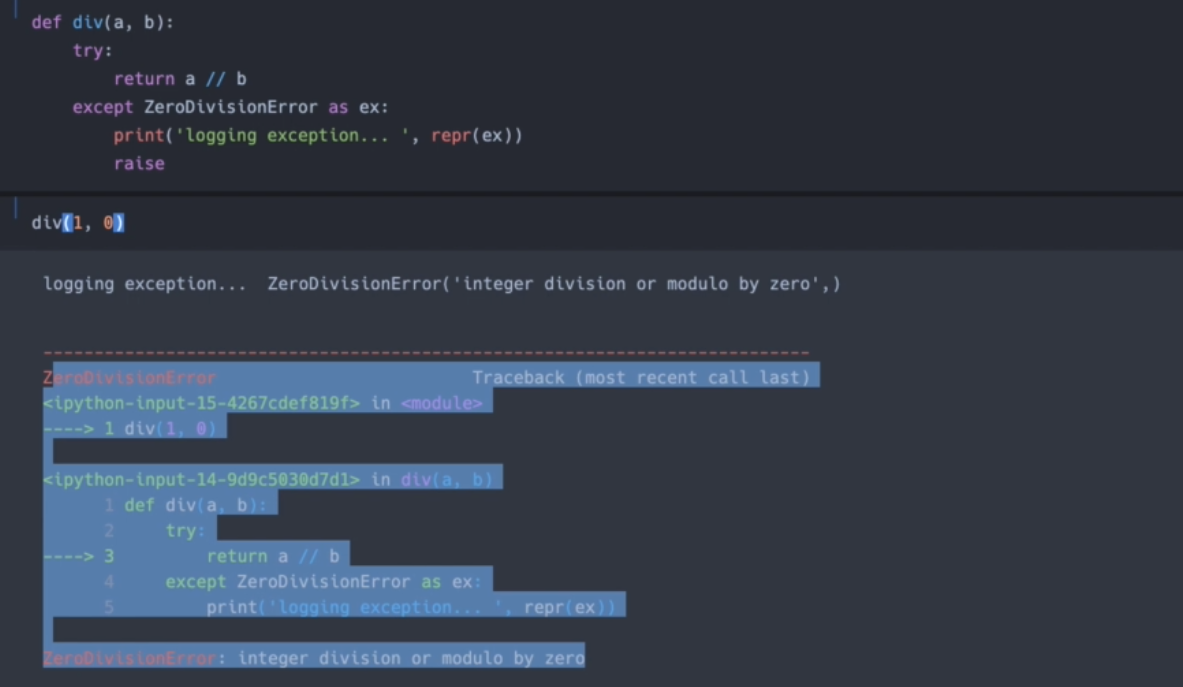

### raise from: instead of including all traceback (e.g. nested exceptions) use raise from  (see 12.6. OOP 4)

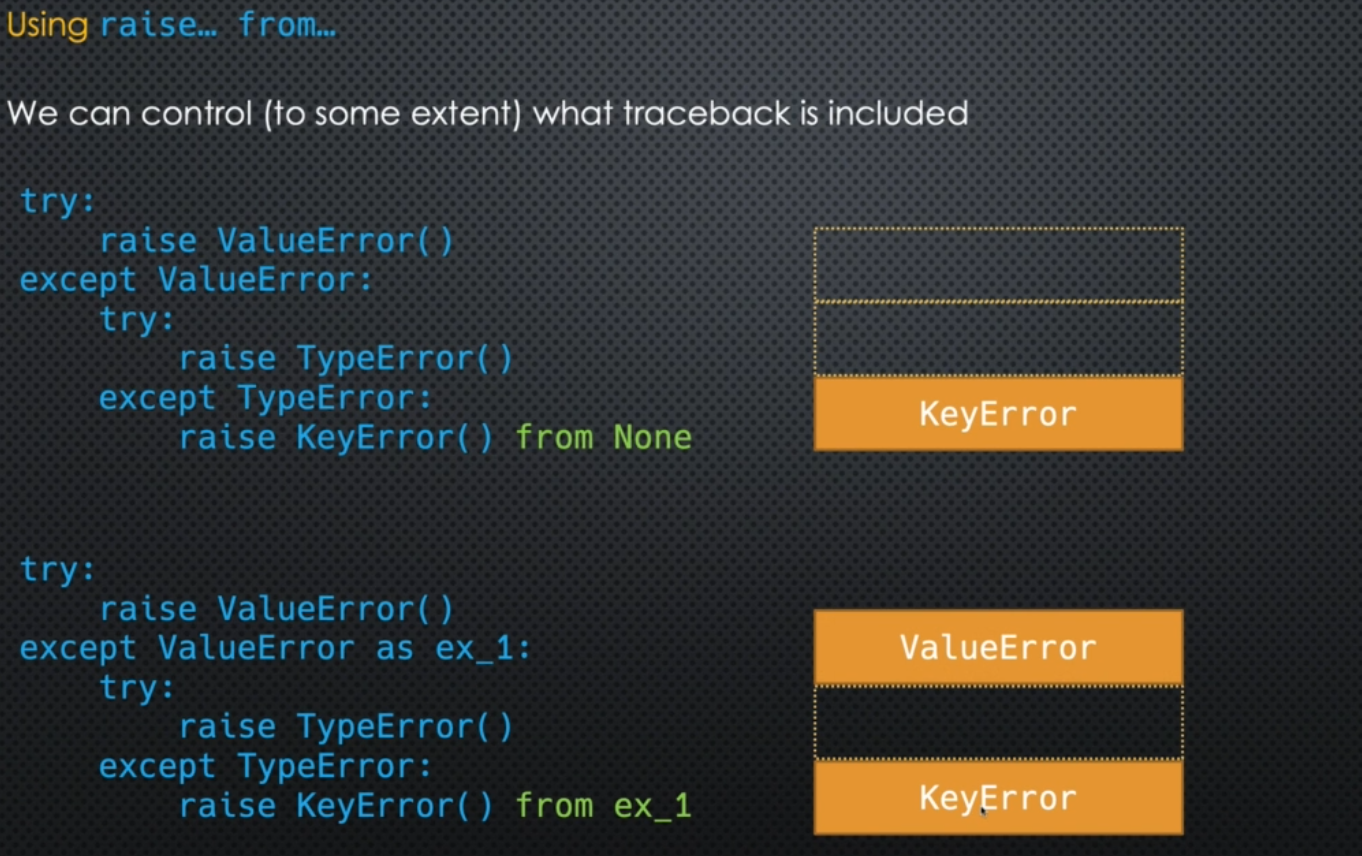

### Change particular exception that we are raising

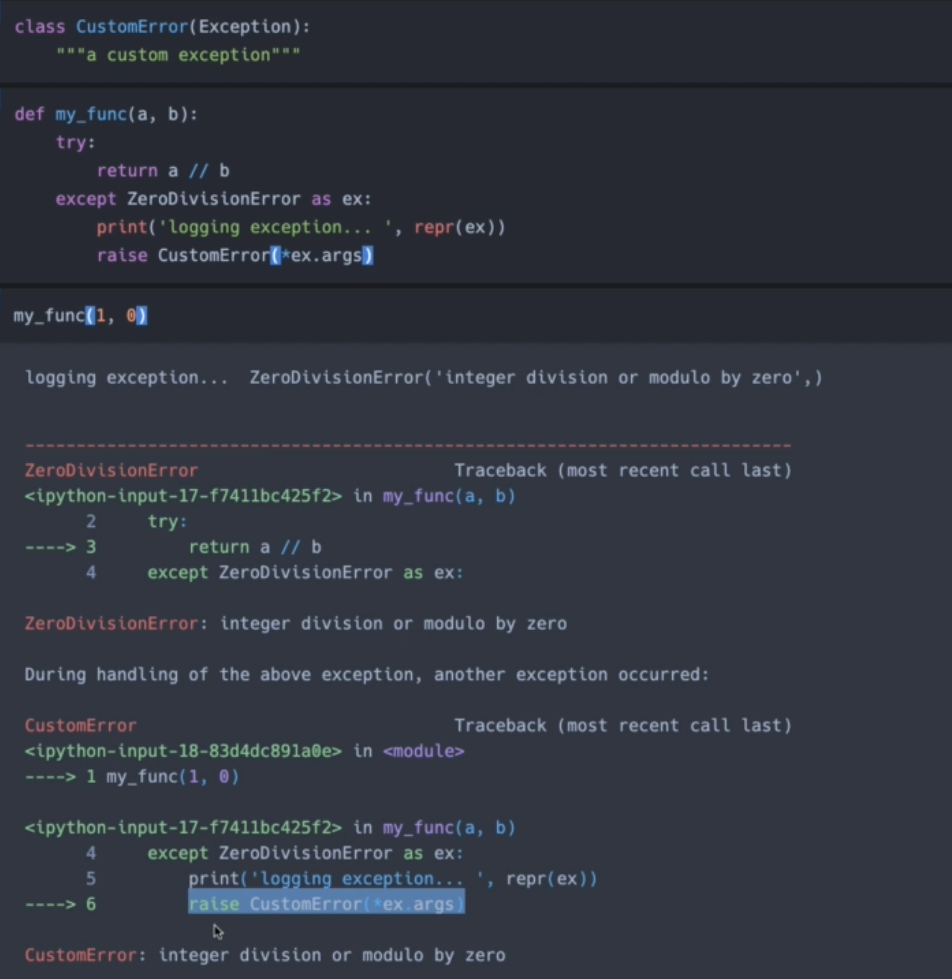

### Context Managers and exceptions

In [ ]:
#Guarantted to close the file even if exception occurs
try:
    with open(fname, 'r') as f:
        pass
except OSError:
    pass

### Exceptions in generators

In [19]:
def sq(lst, i):
    return lst[i]**2
def squares(lst, num):
    for i in range(num):
        try:
            yield sq(lst, i)
        except Exception:
            return
    
l = [1,2,3]
list(squares(l,7))

[1, 4, 9]

In [20]:
l = [1,2, '3', 4, 5]
list(squares(l,7)) ## PROBLEM!! that's why you should catch specific exceptions!

[1, 4]

In [22]:
def sq(lst, i):
    return lst[i]**2

def squares(lst, num):
    for i in range(num):
        try:
            yield sq(lst, i)
        except IndexError:
            return
        except TypeError:
            yield int(lst[i])**2
            
l = [1,2, '3', 4, 5]
list(squares(l,7))

[1, 4, 9, 16, 25]

### Exceptions are classes

In [14]:
ex = ValueError('custom message')
str(ex), repr(ex) 

('custom message', "ValueError('custom message')")

### Stack trace

In [16]:
def f1():
    f2()
    
def f2():
    #f3()
    try:
        f3()
    except ValueError:
        print('handling exception')
    
def f3():
    #raise ValueError() or
    ex = ValueError('custom value error')
    raise ex
    
f1()

ValueError: custom value error

In [5]:
name = 123

try:
    if type(name) != str:
        print('1.')
        raise TypeError('name must be string')
    if name=='':
        print('2.')
        raise ValueError('name cannot be empty')
except (TypeError, ValueError):
    print('3.')
    raise

1.
3.


TypeError: name must be string

In [4]:
name = ''

try:
    if type(name) != str:
        print('1.')
        raise TypeError('name must be string')
    if name=='':
        print('2.')
        raise ValueError('name cannot be empty')
except (TypeError, ValueError):
    print('3.')
    raise

2.
3.


ValueError: name cannot be empty

In [6]:
name = 123

try:
    if type(name) != str:
        print('1.')
        raise TypeError('name must be string')
    if name=='':
        print('2.')
        raise ValueError('name cannot be empty')
except (TypeError, ValueError) as e:
    print('3a.')
    print(e)
    print('3.')
    raise

1.
3a.
name must be string
3.


TypeError: name must be string

In [7]:
name = ''

try:
    if type(name) != str:
        print('1.')
        raise TypeError('name must be string')
    if name=='':
        print('2.')
        raise ValueError('name cannot be empty')
except (TypeError, ValueError) as e:
    print('3a.')
    print(e)
    print('3.')
    raise

2.
3a.
name cannot be empty
3.


ValueError: name cannot be empty